# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
**Цель исследования:**
1. Изучить кикие факторы больше всего влияют на общую (полную) стоимость объекта.
2. Посчитайть среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 
3. Описать, как стоимость объектов зависит от расстояния до центра города
4. Общий вывод

**Ход исследования:**
Данные я получу из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, потребуется обзор данных.

Я проверю данные и их типы на ошибки/неточности и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению анализа.

Таким образом, мое исследование пройдет в 7 этапов:
- Обзор данных
- Предобработка данных
- Расчеты и добавление результатов в таблицу
- Проведение исследоватеьского анализа данных
- Написание общего вывода

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

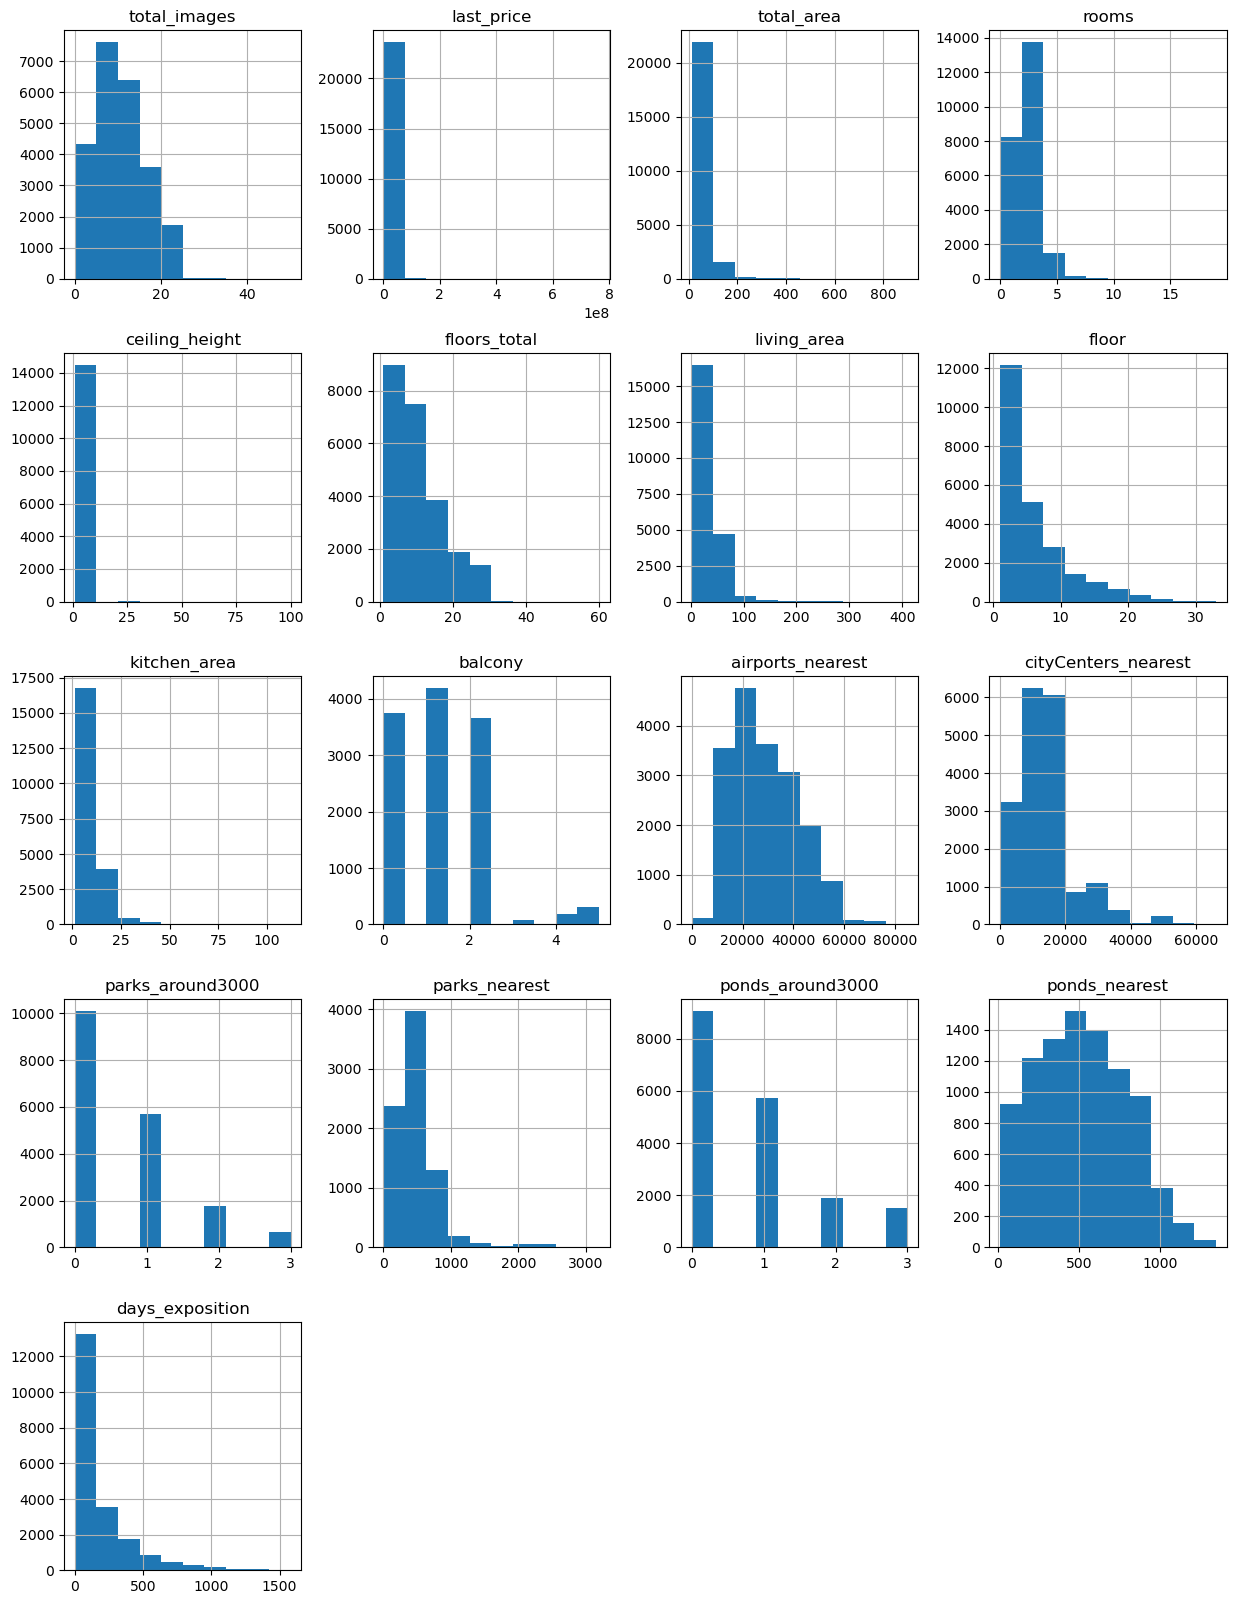

In [3]:
df.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполняем пропущенные значения в столбце ceiling_height (высота потолков) и floors_total (всего этажей в доме) - берем медианные значения:

In [5]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

Заполняем пропущенные значения в столбце living_area (жилая площадь в кв метрах), kitchen_area (площадь кухни в квадратных метрах (м²)) - медианным значениям в зависимости от количества комнат в квартире:

In [6]:
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()
    df.loc[(df['rooms'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == t), 'kitchen_area'].median()
    

Заполняем пропущенные значения в столбцах:
is_apartment (апартаменты) - логично предположить, что если есть пропуск - значит не апартаменты
balcony (число балконов) - логично предположить, что если есть пропуск - значит нет балконов
locality_name (название населённого пункта) - заменим на неизвестно

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
#не уверена в этом коде, у меня не получалось сразу заменить 'nan' на неизвестно
df['locality_name'] = df['locality_name'].fillna(0)
df.loc[df['locality_name'] == 0, 'locality_name'] = 'неизвестно'

В этих столбцах логичную замену предложить невозможно:

airports_nearest         
cityCenters_nearest      
parks_around3000         
parks_nearest           
ponds_around3000         
ponds_nearest        

В данном столбце days_exposition не стала также заполнять пропуски, возможно эти объявнения не закрылись продажей.          

In [8]:
#проверяю заполнились ли пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Остались пропуски в площади кухонь - логично предположить, что это студии, т.к. кухни там нет, следовательно и площадь 0 - заменим их на 0:

In [9]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
#еще раз проверяем
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Все возможные пропуски заполнены.

**Причины, которые могли привести к пропускам данных**

- Продавец мог посчитать не важным для продажи квартиры заполнение той или иной характеристики квартиры
- Отсутствие той или иной характеристики квартире, выставленной на продажу
- Также возможно имеет место быть кривой запрос к БД или технический сбой

**Смена типов данных**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Меняем тип данных в столбце first_day_exposition в формат даты, last_price, floors_total, balcony на int

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Почему нужно изменить тип данных**

Тип данных необходимо изменить для работы с датой и времением, чтобы в дальнейшем была возможность исследовать статистику по месяцам, дням, годам.
Также заменила количество балконов и общее количество этажей на int, т.к. не бывает дробных значений данных параметров

**Работа с дубликатами**

In [12]:
df['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
df['locality_name'] = df['locality_name'].replace(to_replace=('посёлок', 'поселок городского типа', 'коттеджный поселок', 'посёлок городского типа', 'городской посёлок', 'поселок', 'городской поселок'), value='поселок', regex=True)   
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок Кузьмоловский', 'садовое товарищество Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Ш

**Поиск и устранение редких и выбивающихся значений**

In [14]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.321982,5.892358,10.377514,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,21.700627,4.885249,5.720157,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Редкие и выбивающиеся значения- в столбце ceiling_height исправлена высота потолков. 

В целом по столбцам сложно сказать, что максимальные отклонения от стандартного, которые могут повлиять на выводы исследования это столбцы:
- total_area - где std больше 35, что свидетельствует о наличии выбросов
- floors_total - где также высокое отклонение, вызывают вопросы максимальные этажности домов - 60, для СПб это сомнительные значения, такой этажностью может похвастаться только Лахта-центр, который не должен быть в этой выборке.
- living_area, kitchen_area - квартиры с огромной площадью также могут повлиять на результаты и их не много, судя по медианным значениям
- airports_nearest, cityCenters_nearest - 84 и 65 км до аэропорта также сильно выбиваются  и являются выбросами.

В целом необходимо проработать значения в столбцах с максимальным std. Не будет критичным отклонение в столбце: total_images, т.к. его не используем для анализа и в столбцах airports_nearest, cityCenters_nearest - т.к. там есть nan

ВЫСОТА ПОТОЛКОВ

In [15]:
#смотрим аномальные значения по столбцу ceiling_height
df.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
17857,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,9.5,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,...,10.0,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,9.0,1,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


In [16]:
#Делим все потолки выше 20 метров на 10
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height']/10)
df.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.400,5,False,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.500,15,False,...,9.04,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000,25.0,2018-07-25,1,10.0,5,14.000,5,True,...,11.00,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
5863,20,5650000,45.0,2018-08-15,1,8.3,16,19.300,14,False,...,8.30,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
17442,0,5350000,54.0,2015-06-16,2,8.0,5,29.000,2,False,...,8.80,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000,67.0,2016-11-11,3,8.0,16,41.000,1,False,...,8.00,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.300,2,False,...,7.30,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
20264,17,119000000,187.6,2017-07-10,4,6.0,7,147.000,7,False,...,15.60,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000,71.0,2017-07-21,0,5.8,5,68.000,5,False,...,0.00,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000,399.0,2015-01-21,5,5.6,6,91.785,6,False,...,15.10,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0


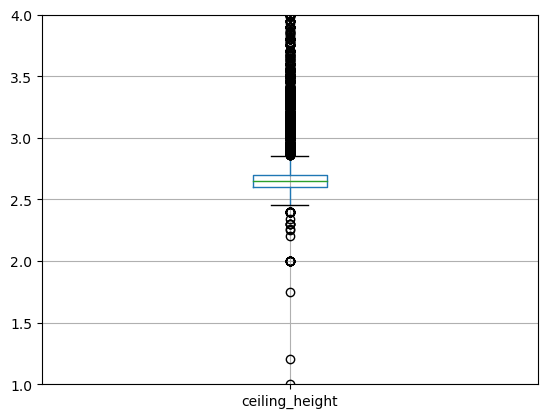

<AxesSubplot:>

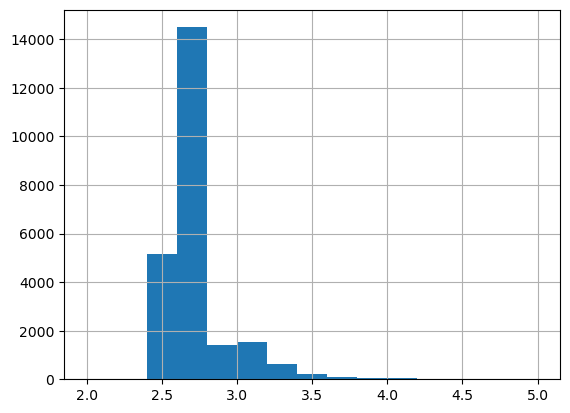

In [17]:
df.boxplot(column='ceiling_height')
plt.ylim(1,4)
plt.show()
df['ceiling_height'].hist(bins=15, range=(2, 5))


In [18]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Заменили аномальные значения - высота потолков 25 м и 32 на вещественные значения: 2.5 м и 3.2 м. Стандартное отклонение не значительно - удалять выбросы с этого столбца не будем.

ЦЕНА НА МОМЕНТ СНЯТИЯ С ПУБЛИКАЦИИ

In [19]:
#Делаем функцию для расчета квартилей с усами + чтобы сразу делал срез по выбросу по df
def quant(column):
    first = column.quantile(.25) - (column.quantile(.75) - column.quantile(.25)) * 1.5
    second = column.quantile(.75) + (column.quantile(.75) - column.quantile(.25)) * 1.5
    df_new = df[(column > first) & (column < second)]
    return(df_new)
#Убираем выбросы в столбцах сохраняем новый df, обновляем индексы
df = quant(df['last_price'])
df = quant(df['total_area'])
df = quant(df['living_area'])
df = quant(df['floors_total'])
df = quant(df['kitchen_area']).reset_index(drop=True)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
1,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
3,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
4,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
20145,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
20146,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20147,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,8.80,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20149.000000,2.014900e+04,20149.000000,20149.000000,20149.000000,20149.000000,20149.000000,20149.000000,20149.000000,20149.000000,14926.000000,14937.000000,14938.000000,6160.000000,14938.000000,7052.000000,17716.000000
mean,9.663954,4.662048e+06,51.432727,1.898258,2.665237,10.646533,29.619255,5.832647,9.003467,0.585984,28991.499464,15197.642766,0.548869,486.486526,0.686772,535.857487,169.549334
std,5.511974,2.056168e+06,16.161181,0.849664,0.209722,6.501556,11.896412,4.835736,2.517901,0.931394,13101.474243,8478.051684,0.757230,324.025523,0.873287,275.757214,207.120240
min,0.000000,4.300000e+05,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.290000e+06,38.700000,1.000000,2.590000,5.000000,18.000000,2.000000,7.000000,0.000000,17839.250000,10878.000000,0.000000,288.000000,0.000000,322.000000,43.000000
50%,9.000000,4.300000e+06,48.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,27359.000000,13744.000000,0.000000,455.000000,0.000000,523.000000,90.000000
75%,13.000000,5.750000e+06,62.000000,3.000000,2.650000,16.000000,38.100000,8.000000,10.440000,1.000000,37948.000000,16779.000000,1.000000,613.000000,1.000000,745.000000,215.000000
max,39.000000,1.189440e+07,100.200000,6.000000,14.000000,29.000000,68.900000,27.000000,16.470000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Было около 20% выбросов (редких и выбивающихся значений), которые мы устранили.

In [21]:
df.duplicated().sum()

0

В целом по столбцам сложно сказать, что максимальные отклонения от стандартного, которые могут повлиять на выводы исследования это столбцы:

total_area - где std больше 35, что свидетельствует о наличии выбросов
floors_total - где также высокое отклонение, вызывают вопросы максимальные этажности домов - 60, для СПб это сомнительные значения, такой этажностью может похвастаться только Лахта-центр, который не должен быть в этой выборке.
living_area, kitchen_area - квартиры с огромной площадью также могут повлиять на результаты и их не много, судя по медианным значениям
airports_nearest, cityCenters_nearest - 84 и 65 км до аэропорта также сильно выбиваются и являются выбросами.
В целом необходимо проработать значения в столбцах с максимальным std. Не будет критичным отклонение в столбце: total_images, т.к. его не используем для анализа и в столбцах airports_nearest, cityCenters_nearest - т.к. там есть nan

Заменили аномальные значения - высота потолков 25 м и 32 на вещественные значения: 2.5 м и 3.2 м. Стандартное отклонение не значительно - удалять выбросы с этого столбца не будем.

Всего было около 20% выбросов (редких и выбивающихся значений), которые мы устранили.

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
df['price_squere_metr'] = df['last_price'] / df['total_area'] # считаем цену одного квадратного метра
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday # выводим день недели публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month # выводим месяц публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year # выводим год публикации объявления

#делаем функцию для категоризации 
def categorize_floor(floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
df['type_floor'] = df.apply(categorize_floor, axis=1) # категоризируем этажи
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round() # считаем расстояние  в км
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squere_metr,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
1,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
2,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
3,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
4,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,NaN,NaN,NaN,413.0,45000.000000,4,7,2017,другой,NaN
20145,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,352.0,1.0,675.0,239.0,73717.948718,4,8,2016,другой,34.0
20146,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
20147,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN


### Проведите исследовательский анализ данных

**Изучение параметров объектов**

<AxesSubplot:>

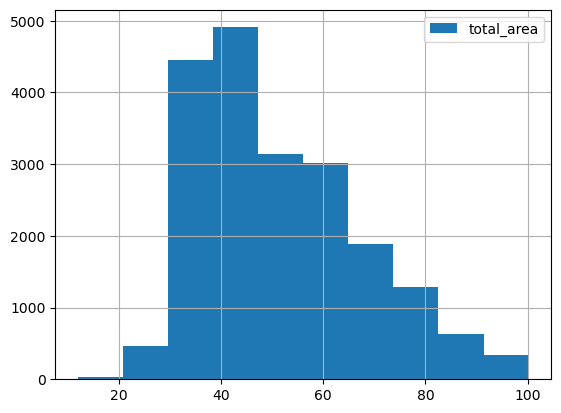

In [63]:
#общая площадь
df['total_area'].hist(legend=True)


Больше всего покупают квартиры площадью от 30 кв м. до 48 кв м. (популярнее всего однднокомнатные квартиры и двухкомнатные)

<AxesSubplot:>

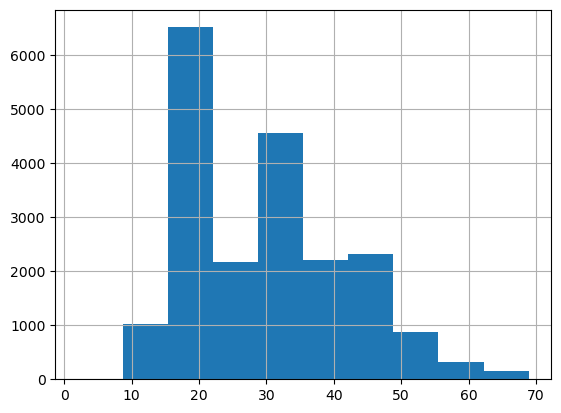

In [24]:
#жилая площадь
df['living_area'].hist()

Больше всего покупают квартиры жилой площадью от 16-22 кв м. и 28-35 кв м. (популярнее всего однднокомнатные квартиры и студии и двухкомнатные, что не противоречит первому выводу)

<AxesSubplot:>

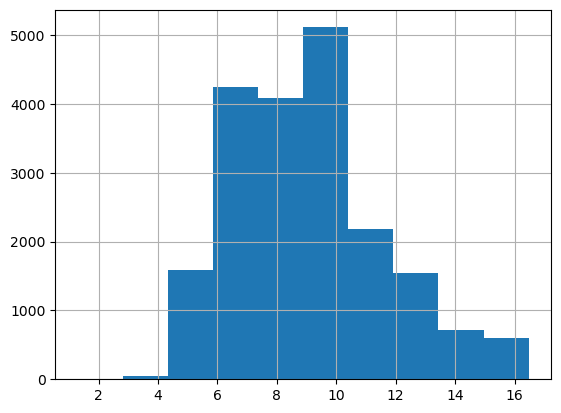

In [25]:
#площадь кухни
df['kitchen_area'].hist()

Самые популярные квартиры с кухней от 6 кв м. до 10 кв м. (предпочтителен средний размер кухонь)

<AxesSubplot:>

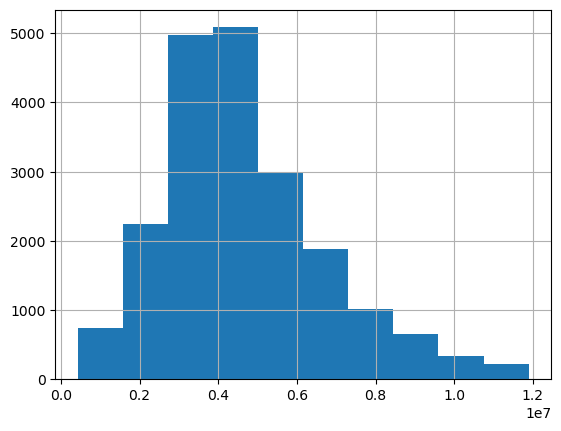

In [26]:
#цена объекта 
df['last_price'].hist()

Цена от 2,5 млн руб до 5 млн рублей

<AxesSubplot:>

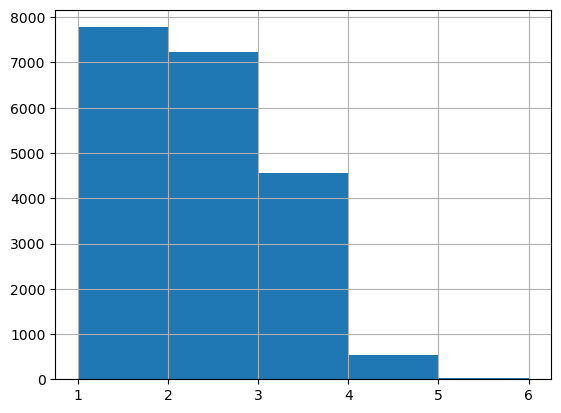

In [27]:
#количество комнат
df['rooms'].hist(bins=5)

Лидеры продаж однокомнатные и двукомнатные квартиры

<AxesSubplot:>

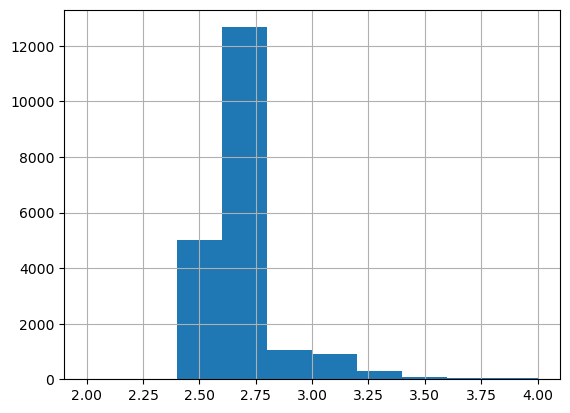

In [28]:
#высота потолков
df['ceiling_height'].hist(bins=10, range=(2,4))

Редко встречаются потолки больше 3 метров

<AxesSubplot:>

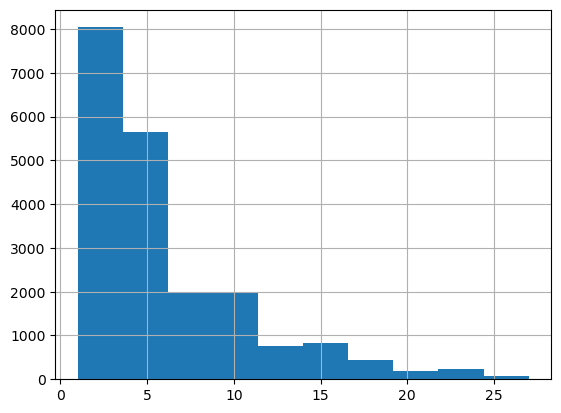

In [29]:
#этаж квартиры;
df['floor'].hist()

Можно слелать вывод о малоэтажности строений в целом в регионе, квартиры с этажностью более 11 встречаются не часто

<AxesSubplot:>

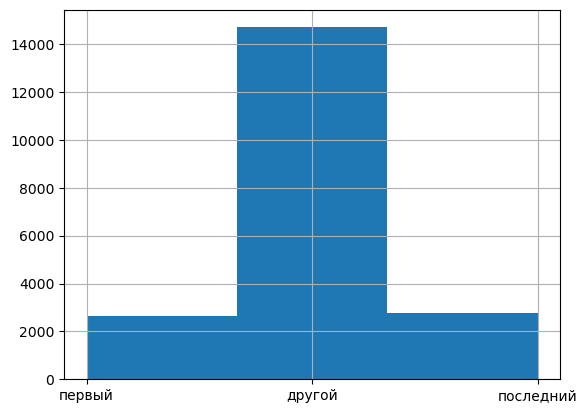

In [30]:
#тип этажа квартиры
df['type_floor'].hist(bins=3)

Квартиры на первом этаже покупают с той же переодичностью, что и на последнем

<AxesSubplot:>

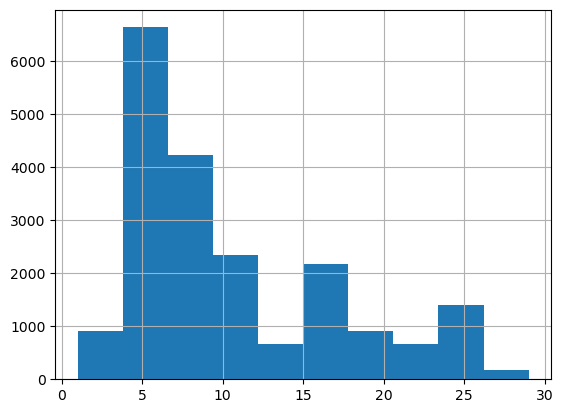

In [31]:
#общее количество этажей в доме
df['floors_total'].hist()

Домов со средней этажностью в регионе больше чем с высокой этажностью

<AxesSubplot:>

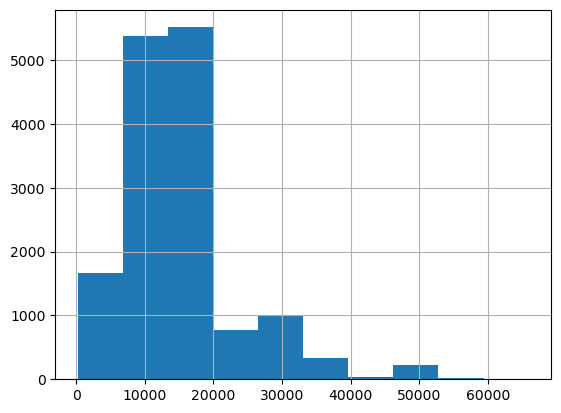

In [32]:
#расстояние до центра города в метрах;
df['cityCenters_nearest'].hist()

Самые популярные районы для покупки квартиры находятся в пределах 8-20 км до центра

<AxesSubplot:>

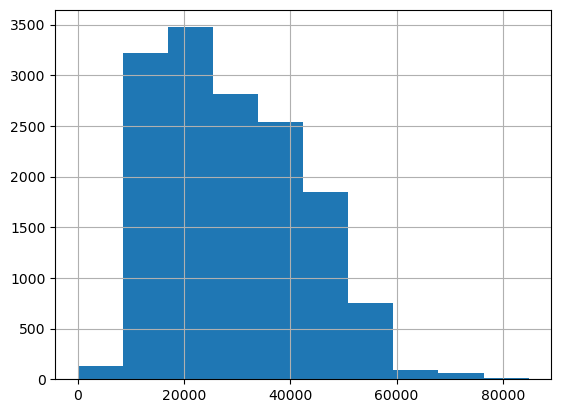

In [33]:
#расстояние до ближайшего аэропорта;
df['airports_nearest'].hist()

Люди покупают квартиры плюс-минус с одинаковой частотой как близко к аэропорту (10 км) так и в пределах 40 км. Далее логично предположить снижение количества квартир (загород)

<AxesSubplot:>

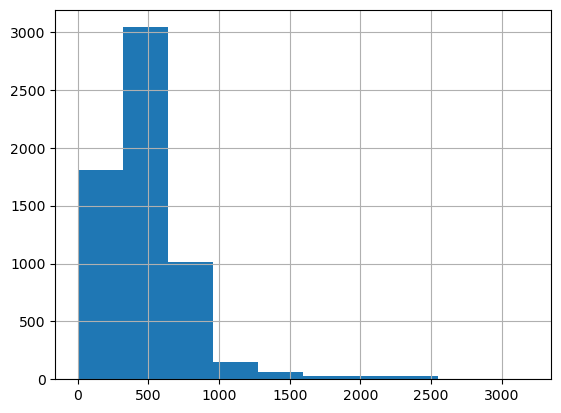

In [34]:
#расстояние до ближайшего парка;
df['parks_nearest'].hist()

Наличие парка соответствует спросу, парк в пределах 1 км может оказать существенное влиение на решение о покупке квартиры

<AxesSubplot:>

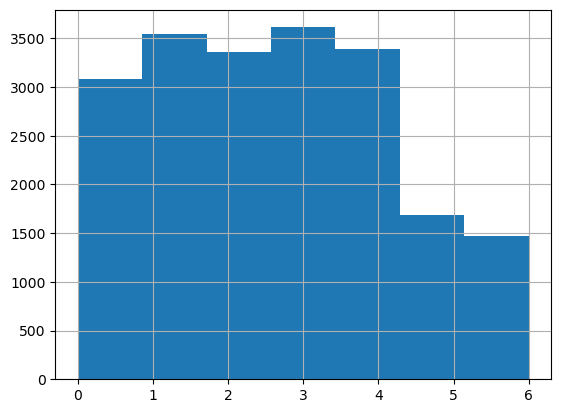

In [35]:
#день публикации объявления
df['weekday_exposition'].hist(bins=7)

В будние дни люди охотнее размещают объявления, чем в выходные

<AxesSubplot:>

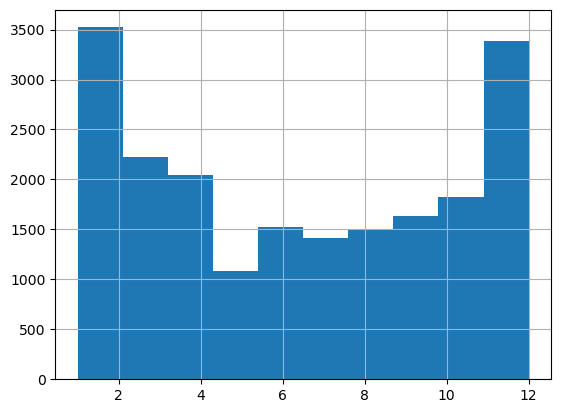

In [36]:
#месяц публикации объявления
df['month_exposition'].hist()

Самые популярные месяцы размещений объявлений - январь и декабрь, в мае - минимальное количество размещенных объявлений. 

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

<AxesSubplot:>

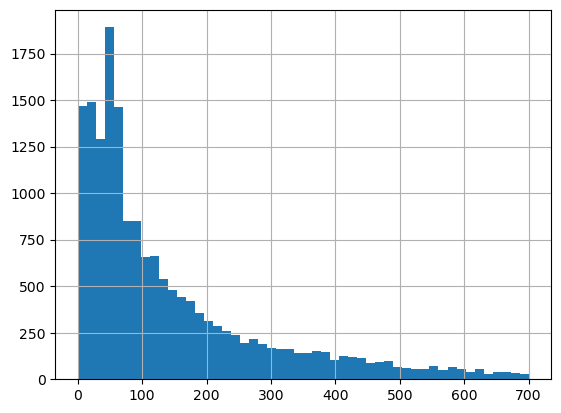

In [37]:
df['days_exposition'].hist(bins=50, range=(0,700))


In [38]:
df.pivot_table(index='rooms', values='days_exposition', aggfunc=('median', 'mean'))

,mean,median
rooms,,
1,157.645070,80.0
2,166.585699,89.0
3,192.845732,110.0
4,194.419069,110.0
5,286.210526,127.0


count    17716.000000
mean       169.549334
std        207.120240
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

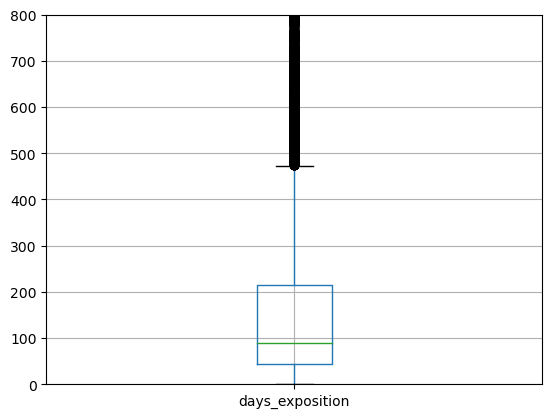

In [39]:
df.boxplot(column='days_exposition')
plt.ylim(0,800)
df['days_exposition'].describe()

Есть большой разброс почти в два раза у медианы и среднего значения, что говорит о выбросах. Обычно продажа занимает 80-100 дней. При этом однокомнатные и двукомнатные квартиры продаются быстрее. Аномально быстрыми можно считать продажи квартир которые меньше 50 дней, все что больше 500 дней уже можно отнести к необычно долгим продажам.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

,last_price,total_area
0,430000,42.200000
1,440000,40.000000
2,450000,40.100000
3,470000,40.833333
4,480000,32.000000


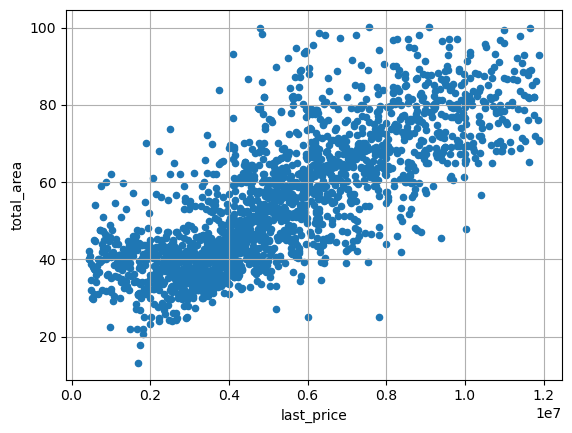

In [40]:
total_area_influence = df.pivot_table(index='last_price', values='total_area').reset_index()
total_area_influence.plot(x='last_price', y='total_area', kind='scatter', grid=True)
total_area_influence.head()

In [41]:
df['last_price'].corr(df['total_area'])

0.6653801227400046

Отлично видно, что с увеличением общей площади увеличивается и цена объекта, хотя есть и выбросы, которых не много. Можно предположить, что это квартиры с плохим или суперхорошим ремонтом или с хорошим плохим расположением.

,last_price,living_area
0,430000,23.250000
1,440000,17.600000
2,450000,25.275000
3,470000,25.866667
4,480000,16.000000


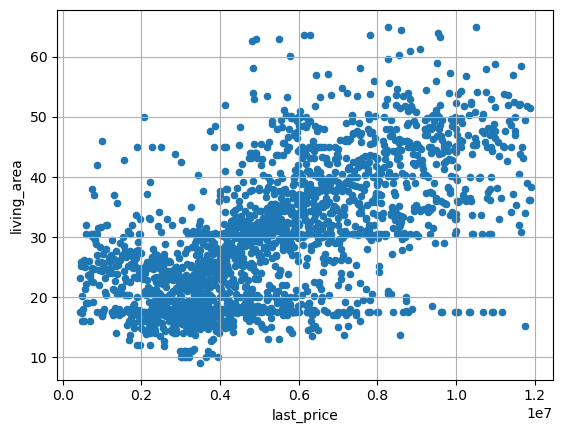

In [42]:
living_area_influence = df.pivot_table(index='last_price', values='living_area').reset_index()
living_area_influence.plot(x='last_price', y='living_area', kind='scatter', grid=True)
living_area_influence.head()

In [43]:
df['last_price'].corr(df['living_area'])

0.522456656565734

Видно, что в целом с увеличением жилой площади увеличивается и цена объекта, но зависимость не такая сильная как с общей площади. Вероятно на цену будут влиеть также наличие балконов, ремонт и т.п.

,last_price,kitchen_area
0,430000,7.400000
1,440000,9.040000
2,450000,7.150000
3,470000,8.513333
4,480000,9.040000


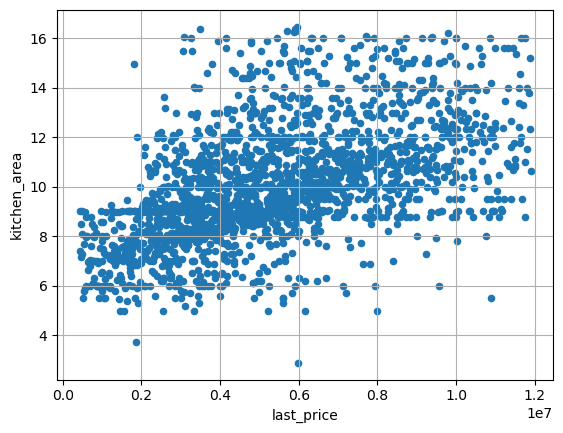

In [44]:
kitchen_area_influence = df.pivot_table(index='last_price', values='kitchen_area').reset_index()
kitchen_area_influence.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True)
kitchen_area_influence.head()

In [45]:
df['last_price'].corr(df['kitchen_area'])

0.43403883873998317

Влияние площади кухни на цену объекта есть, но не несет определяющего эффекта. Много квартир с маленькой площадью кухни имеют высокую цену и наоборот.

,last_price,rooms
0,430000,1.500000
1,440000,1.000000
2,450000,1.750000
3,470000,1.333333
4,480000,1.000000


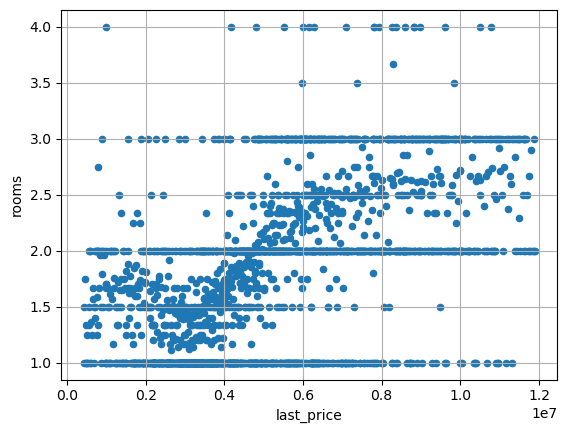

In [46]:
rooms_influence = df.pivot_table(index='last_price', values='rooms').reset_index()
rooms_influence.plot(x='last_price', y='rooms', kind='scatter', grid=True)
rooms_influence.head()

In [47]:
df['last_price'].corr(df['rooms'])

0.4059256479835246

Влияние количества комнат на цену объекта есть, но также как и с площадью кухонь не несет определяющего эффекта. Скорее всего помимо количества комнат смотрят и на общую площадь кв, ремонт.

,type_floor,last_price
0,другой,4.863222e+06
1,первый,3.989447e+06
2,последний,4.242497e+06


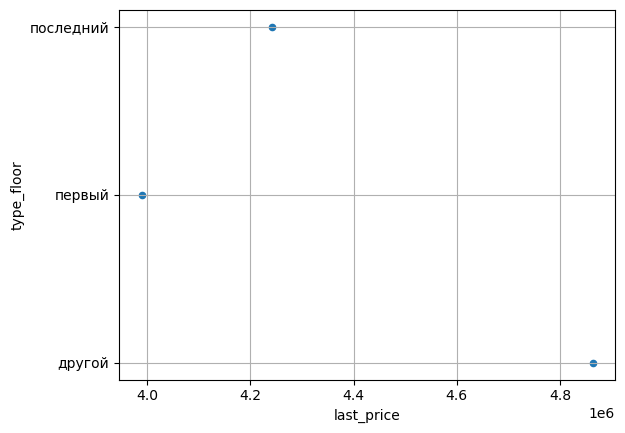

In [48]:
type_floor_influence = df.pivot_table(index='type_floor', values='last_price').reset_index()
type_floor_influence.plot(x='last_price', y='type_floor', kind='scatter', grid=True)
type_floor_influence

На первых и последних этажах цены ниже, чем на других. 

,weekday_exposition,last_price
0,0,4.656663e+06
1,1,4.685828e+06
2,2,4.690226e+06
3,3,4.673760e+06
4,4,4.647514e+06
5,5,4.595702e+06
6,6,4.632558e+06


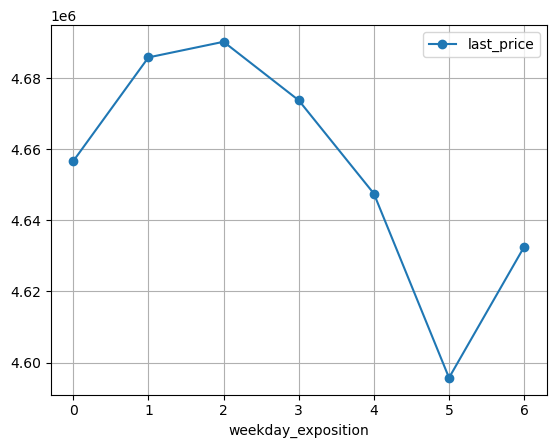

In [49]:
# даты размещения (день недели)
weekday_exposition_influence = df.pivot_table(index='weekday_exposition', values='last_price').reset_index()
weekday_exposition_influence.plot(x='weekday_exposition', y='last_price', style='o-', grid=True)
weekday_exposition_influence

In [50]:
df['last_price'].corr(df['weekday_exposition'])

-0.00828153656297969

Влияния цены на день недели нет. В целом, тенденция на спад стоимости от начала недели к сб, к воскресенье начинается увеличение

,month_exposition,last_price
0,1,4.657858e+06
1,2,4.648053e+06
2,3,4.654887e+06
3,4,4.779604e+06
4,5,4.637121e+06
5,6,4.485949e+06
6,7,4.609875e+06
7,8,4.707846e+06
8,9,4.684031e+06
9,10,4.637660e+06


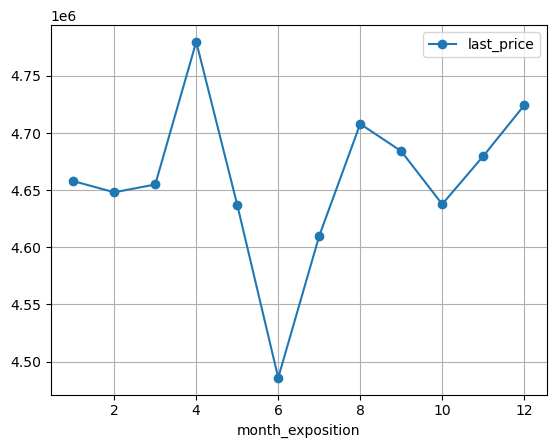

In [51]:
# даты размещения (месяц)
month_exposition_influence = df.pivot_table(index='month_exposition', values='last_price').reset_index()
month_exposition_influence.plot(x='month_exposition', y='last_price', style='o-', grid=True)
month_exposition_influence

In [52]:
df['last_price'].corr(df['month_exposition'])

0.0030086940549078293

Влияния цены на месяц нет. Выгоднее всего квартиру продавать в апреле, августе и декабре. Самые низние цены в июне.

,year_exposition,last_price
0,2014,5.374504e+06
1,2015,4.904883e+06
2,2016,4.573363e+06
3,2017,4.580616e+06
4,2018,4.625928e+06
5,2019,4.972113e+06


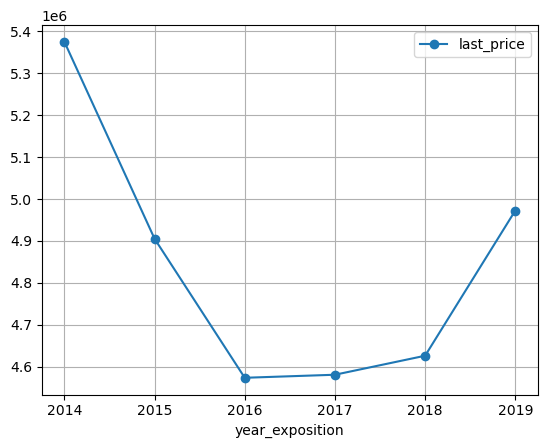

In [53]:
# даты размещения (год)
year_exposition_influence = df.pivot_table(index='year_exposition', values='last_price').reset_index()
year_exposition_influence.plot(x='year_exposition', y='last_price', style='o-', grid=True)
year_exposition_influence

In [54]:
df['last_price'].corr(df['year_exposition'])

0.020588610557583962

С 2014 года цены шли на спад, в 2018 начали расти

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [55]:
average_price = df.pivot_table(index='locality_name', values='price_squere_metr', aggfunc=('count', 'median'))
average_price.columns = ['price_squere_metr_count', 'price_squere_metr_median']
average_price.sort_values(by='price_squere_metr_count', ascending=False).head(10)

,price_squere_metr_count,price_squere_metr_median
locality_name,,
Санкт-Петербург,12653,101865.136298
поселок Мурино,510,84262.422360
поселок Шушары,421,76829.268293
Всеволожск,376,65538.631852
Колпино,321,74722.222222
Пушкин,319,98039.215686
поселок Парголово,306,92362.911266
Гатчина,296,67671.510409
деревня Кудрово,258,92076.099881


Максимальная цена кваратного метра в СПб, Пушкине, Парголово и Кудрово - более 90 000 руб за кв метр
Минимальная цена кваратного метра в Выборге, Всеволожске и Гатчине - менее 67 000 руб за кв метр

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

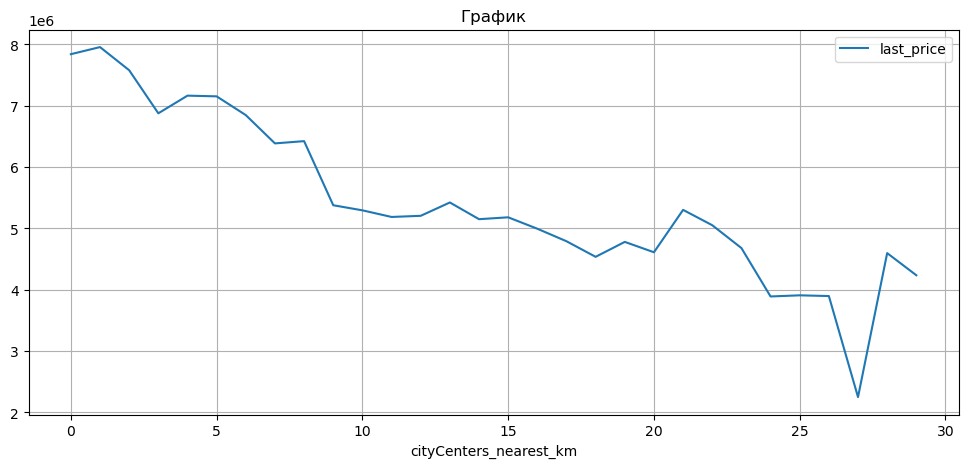

In [64]:
(df
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_nearest_km', values='last_price')
 .plot(grid=True, figsize=(12,5), title = 'График')
);


Чем больше расстояния до центра города тем меньше средняя стоимость объектов. Однако небольшой рост стоимости существуетпосле 27 км. Возможно это загородная недвижимость.

### Общий вывод

1. Пропущенные значения в столбцах:
 
Необходимо обратить внимание на:
Не все характеристики квартиры заполнены, возможно стоит добавить чек-бокс на сайт со своим вариантом заполнения или указаием что что-то отсутствует для дальнейшего более корректного заполнения пропусков.


2. Исследовательский анализ данных:
Исследование параметров объектов:
- Больше всего покупают квартиры  с общей площадью от 30 кв м. до 48 кв м, из них жилая варьируется от 16-22 кв м. и 28-35 кв м., площадь кухни - от 6 кв м. до 10 кв м.
- Больше всего покупают квартир в диапазоне от 2,5 млн руб до 5 млн рублей;
- Лидеры продаж однокомнатные и двукомнатные квартиры;
- Редко встречаются потолки больше 3 метров;
- Можно слелать вывод о малоэтажности строений в целом в регионе, квартиры с этажностью более 11 встречаются не часто;
- Квартиры на первом этаже покупают с той же переодичностью, что и на последнем;
- Самые популярные районы для покупки квартиры находятся в пределах 8-20 км до центра;
- Близость аэропорта не сильно влияет на покупку квартир
- Наличие парка соответствует спросу, парк в пределах 1 км может оказать существенное влиение на решение о покупке квартиры;
- В будние дни люди охотнее размещают объявления, чем в выходные. Самые популярные месяцы размещений объявлений - январь и декабрь, в мае - минимальное количество размещенных объявлений.


3. Обычно продажа квартиры занимает 80-100 дней. При этом однокомнатные и двукомнатные квартиры продаются быстрее. 
 

4. Зависимость цены от:
- Площадь квартиры влияет на увеличенте цены объекта в большей степени, чем жилая площадь и площадь кухни. 
- Как правило, чем большее количество комнат, тем больше цена, но больше влияет на цену площадь квартиры.
- На первых и последних этажах цены ниже, чем на других.
- Существует тенденция на уменьшение стоимости квартиры при размещении объявления в начала недели к сб, в воскресенье начинается увеличение. Выгоднее всего квартиру продавать в апреле, августе и декабре. Самые низние цены в июне. С 2014 года цены шли на спад, в 2018 начали расти.  


5. Максимальная цена кваратного метра в СПб, Пушкине, Парголово и Кудрово - более 90 000 руб за кв метр Минимальная цена кваратного метра в Выборге, Всеволожске и гатчине - менее 67 000 руб за кв метр


6. Чем больше расстояния до центра города тем меньше средняя стоимость объектов. Однако небольшой рост стоимости существуетпосле 27 км. Возможно это загородная недвижимость.